In [1]:
import pathlib
from umap_manager import UMAPManager

In [2]:
DATA_DIR = pathlib.Path('../TCGA/downloads')
RESULT_DIR = pathlib.Path('./umap_results')
RESULT_DIR.mkdir(exist_ok=True)

case = 'TCGA-3C-AALK-01Z-00-DX1'

# instantiate manager
manager = UMAPManager(DATA_DIR / case)

# Disable computation of density column
manager.compute_density = False

# Filter by class
manager.class_filters = ['CancerEpithelium']

# Sample 500 random cells
manager.sample_size = 500

# Exclude some column patterns
manager.exclude_columns = [
    c for c in manager.columns
    if any(substr in c for substr in ['Identifier.', 'ClassifProbab.', 'Unconstrained.'])
]

# View data
manager.data

Reading HIPS data.
Found 412219 features.


,Orientation.Orientation,Size.Area,Size.ConvexHullArea,Size.MajorAxisLength,Size.MinorAxisLength,Size.Perimeter,Shape.Circularity,Shape.Eccentricity,Shape.EquivalentDiameter,Shape.Extent,...,Cytoplasm.Haralick.Entropy.Mean,Cytoplasm.Haralick.Entropy.Range,Cytoplasm.Haralick.DifferenceVariance.Mean,Cytoplasm.Haralick.DifferenceVariance.Range,Cytoplasm.Haralick.DifferenceEntropy.Mean,Cytoplasm.Haralick.DifferenceEntropy.Range,Cytoplasm.Haralick.IMC1.Mean,Cytoplasm.Haralick.IMC1.Range,Cytoplasm.Haralick.IMC2.Mean,Cytoplasm.Haralick.IMC2.Range
127,-0.295473,218.0,222.0,17.611668,15.952068,52.727922,0.985338,0.423776,16.660319,0.908333,...,4.856536,0.390114,0.010979,0.002755,1.607875,0.379738,-0.288614,0.159824,0.890593,0.098248
84,0.100628,131.0,137.0,17.020734,9.889777,42.142136,0.926932,0.813873,12.914890,0.818750,...,4.670920,0.517439,0.010572,0.004482,1.893899,0.684373,-0.443951,0.156241,0.962980,0.030487
316,1.089841,149.0,155.0,14.515357,13.114381,42.970563,1.014038,0.428623,13.773623,0.818681,...,4.999608,0.389112,0.008204,0.002264,2.100807,0.390586,-0.285391,0.119366,0.896826,0.078437
4,-0.222878,164.0,166.0,17.155373,12.305990,45.556349,0.993015,0.696738,14.450304,0.854167,...,4.949156,0.494595,0.010405,0.004003,1.846046,0.604035,-0.429753,0.155959,0.963917,0.037580
439,0.542726,109.0,111.0,12.093304,11.598869,36.485281,1.028966,0.283017,11.780624,0.900826,...,5.156508,0.316132,0.011070,0.002620,1.590676,0.343603,-0.389579,0.112275,0.957640,0.031518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.078113,251.0,260.0,20.587725,15.663732,58.142136,0.933043,0.648953,17.876888,0.871528,...,6.002700,0.513566,0.009263,0.003228,1.854177,0.470315,-0.360620,0.152428,0.960985,0.041867
2,1.485512,179.0,185.0,20.644579,11.396879,51.313708,0.854272,0.833810,15.096684,0.856459,...,5.364832,0.441029,0.009982,0.002713,1.710915,0.377372,-0.370775,0.127353,0.953361,0.043443
299,0.098963,121.0,133.0,18.621298,8.510684,44.485281,0.768356,0.889446,12.412171,0.790850,...,4.732080,0.339620,0.012847,0.002299,1.337516,0.272298,-0.425609,0.124405,0.959473,0.030066
292,0.459157,233.0,240.0,18.207009,16.404187,54.384776,0.989945,0.433857,17.223960,0.856618,...,5.108162,0.406533,0.012202,0.003178,1.454154,0.344634,-0.486760,0.117364,0.980496,0.014594


In [3]:
# Write data to parquet for Girder
manager.write_data_parquet(RESULT_DIR / 'AALK_CancerEpithelium.parquet')

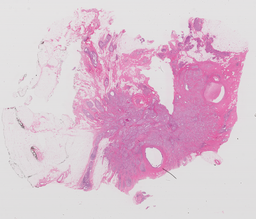

In [4]:
# Show image
manager.image

In [5]:
# Show cell thumbnails
manager.show_cell_thumbnails(range(20))

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00"\x00\x00\x00"\x08\x02\x00\x00\…

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00"\x00\x00\x00"\x08\x02\x00\x00\…

In [6]:
n_training = 400
train_set = manager.data[:n_training]
test_set = manager.data[n_training:]

# First dimensionality reduction will train a UMAP Transform
manager.reduce_dims(train_set, plot=True, parquet_path=RESULT_DIR / 'AALK_CancerEpithelium_UMAP_train.parquet')

# Subsequent dimensionality reductions will leverage trained UMAP Transform
manager.reduce_dims(test_set, plot=True, parquet_path=RESULT_DIR / 'AALK_CancerEpithelium_UMAP_predict.parquet')

Training UMAP Transform.
Completed training in 6.657143 seconds.
Running inference on 400 cells with trained UMAP Transform.
Completed inference in 0.000815 seconds.


FigureWidget({
    'data': [{'marker': {'color': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'UBhgGHAYgBiQGKAYsBjAGNAY4BjwE='),
                                   'dtype': 'i2'}},
              'mode': 'markers',
              'type': 'scatter',
              'uid': 'c7e2badc-681d-4d26-8fa8-0c65496c57c7',
              'x': {'bdata': ('88BcPO/BAUDZELU+E76xP/OXGkA3GJ' ... '9/2gq/FgmVQPAauUCuBbBA5bxoQA=='),
                    'dtype': 'f4'},
              'y': {'bdata': ('lWsCQY8Jv0DbiohA6tDMQNmvAEHyEI' ... 'DkhcpAYzv/QJLjBkENU9xApvqDQA=='),
                    'dtype': 'f4'}}],
    'layout': {'template': '...'}
})

VBox()

Running inference on 100 cells with trained UMAP Transform.
Completed inference in 2.362197 seconds.


FigureWidget({
    'data': [{'marker': {'color': {'bdata': ('AAECAwQFBgcICQoLDA0ODxAREhMUFR' ... '9QUVJTVFVWV1hZWltcXV5fYGFiYw=='),
                                   'dtype': 'i1'}},
              'mode': 'markers',
              'type': 'scatter',
              'uid': 'ff497cff-3128-48b3-b57d-4b7f80e84549',
              'x': {'bdata': ('examP+dBvT9RXQtAwAgFvpTIDED3BR' ... 'Bj6F6/1e8XP0ZpW0DIk8e/O7LAPg=='),
                    'dtype': 'f4'},
              'y': {'bdata': ('jQmGQHsnzUAE+aZAgr+kQDhJ8kA5kp' ... 'C/OcVA1u72QJzkx0Cm+thAO7H9QA=='),
                    'dtype': 'f4'}}],
    'layout': {'template': '...'}
})

VBox()

In [7]:
# For each target cell in a given list of ids, find the 10 most similar cells and display them
target_cells = [1, 2]
manager.nearest_neighbors(target_cells, n=10, show=True)

Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.634624 seconds.
Running inference on 2 cells with trained UMAP Transform.
Completed inference in 0.005389 seconds.
Cell 1:


GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1e\x00\x00\x00 \x08\x02\x00\x…

10 most similar cells:


GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00,\x00\x00\x00*\x08\x02\x00\x00\…


Cell 2:


GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00$\x00\x00\x00"\x08\x02\x00\x00\…

10 most similar cells:


GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00"\x00\x00\x00$\x08\x02\x00\x00\…

In [8]:
# Save trained transform to file
transform_path = DATA_DIR / 'my_umap.transform'
manager.save_transform(transform_path)

Saved UMAP Transform to ../TCGA/downloads/my_umap.transform.


In [9]:
# instantiate a second manager for a different case
manager_2 = UMAPManager(DATA_DIR / 'TCGA-3C-AALI-01Z-00-DX1')
manager_2.compute_density = False
manager_2.class_filters = ['CancerEpithelium']
manager_2.sample_size = 500
manager_2.exclude_columns = [
    c for c in manager_2.columns
    if any(substr in c for substr in ['Identifier.', 'ClassifProbab.', 'Unconstrained.'])
]

# Write data to parquet for Girder
manager_2.write_data_parquet(RESULT_DIR / 'AALI_CancerEpithelium.parquet')

# Load the saved transform file
manager_2.load_transform(transform_path)

# Run an inference with the loaded transform
manager_2.reduce_dims(plot=True, parquet_path=RESULT_DIR / 'AALI_CancerEpithelium_UMAP_predict.parquet')

Reading HIPS data.
Found 489293 features.
Loaded UMAP Transform from ../TCGA/downloads/my_umap.transform.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.635995 seconds.


FigureWidget({
    'data': [{'marker': {'color': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'HqAesB7AHtAe4B7wHwAfEB8gHzAQ=='),
                                   'dtype': 'i2'}},
              'mode': 'markers',
              'type': 'scatter',
              'uid': '3bfcc102-fdd1-46c6-9aa1-51c81f85e83c',
              'x': {'bdata': ('E50zQWnt30B6mlBAm82bQAncBkGg1f' ... '5AaArTQKKZEUFaRtBA2weIQO1Fy0A='),
                    'dtype': 'f4'},
              'y': {'bdata': ('d9NfQP12bEBXwi9AaW6+QJw7YkBoNZ' ... 'Q/5ziwP+OXG0AW1HRAc9YjP1KOekA='),
                    'dtype': 'f4'}}],
    'layout': {'template': '...'}
})

VBox()